In [2]:
from pycaret.utils import version
version()

'3.0.0.rc8'

In [3]:
from pycaret.datasets import get_data
#here is the list of all available datasets
all_datasets=get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [4]:
dataset=get_data('bike')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [5]:
# dataset = get_data('bike', profile=True) # profile=True is going to do an automated EDA, you need to "pip install pycaret[analysis]" first. 

In [6]:
# for the sake of time, lets work with a tiny subsample of the data, 
dataset=dataset.sample(1000)

In [7]:
data = dataset.sample(frac=0.9, random_state=123)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (900, 15)
Unseen Data For Predictions: (100, 15)


In [8]:
data.shape

(900, 15)

In [9]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,11175,4/15/2012,2,1,4,19,0,0,0,1,0.70,0.6364,0.42,0.2537,379
1,17333,12/30/2012,1,1,12,1,0,0,0,2,0.26,0.2273,0.56,0.4179,28
2,3151,5/16/2011,2,0,5,4,0,1,1,1,0.50,0.4848,1.00,0.1343,6
3,15181,9/29/2012,4,1,9,17,0,6,0,1,0.60,0.6212,0.38,0.3582,712
4,4564,7/14/2011,3,0,7,1,0,4,1,1,0.66,0.6212,0.61,0.2537,25


In [10]:
data.nunique()

instant       900
dteday        534
season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      3
temp           45
atemp          52
hum            74
windspeed      22
cnt           415
dtype: int64

In [11]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [12]:
categoricals = ['season', 'yr', 'mnth', 'hr','holiday', 'weekday','workingday','weathersit' ]
numericals   = ['temp', 'atemp', 'hum', 'windspeed']
ignore       = ['instant','dteday']

Setting up Environment in PyCaret

setup():

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes two mandatory parameters: data and target. All the other parameters are optional.

In [13]:
from pycaret.regression import *

The latest version of PyCaret is Object oriented API. This means that the settings are linked with an object, you can run as many experiments as you want in the same notebook and compare them seamlessly not just across different modeling options but also different preprocessing settings.

In [14]:
# experience1 = no preprocessing
exp1 = RegressionExperiment() 
exp1.setup(data, ignore_features=ignore,  target='cnt', session_id=555, train_size=0.7, preprocess=False, categorical_features= categoricals, numeric_features=numericals)

,Description,Value
0,Session id,555
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(900, 15)"
4,Transformed data shape,"(900, 13)"
5,Transformed train set shape,"(630, 13)"
6,Transformed test set shape,"(270, 13)"
7,Ignore features,2
8,Numeric features,4
9,Categorical features,8


In [15]:
# experiment 2, with preprocessing and more!!!
exp2 = RegressionExperiment() 
exp2.setup(data, ignore_features=ignore, target='cnt', session_id=555, train_size=0.7, categorical_features= categoricals, numeric_features=numericals, numeric_imputation='mean', categorical_imputation='mode' ,
           preprocess=True, normalize=True , remove_outliers=True, ordinal_features=None)

,Description,Value
0,Session id,555
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(900, 15)"
4,Transformed data shape,"(876, 13)"
5,Transformed train set shape,"(602, 13)"
6,Transformed test set shape,"(270, 13)"
7,Ignore features,2
8,Ordinal features,3
9,Numeric features,4


Compare Models

This function trains and evaluates performance of all estimators available in the model library using cross validation. The output of this function is a score grid with average cross validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [16]:
top3_exp1 = exp1.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,48.2885,5495.5792,73.0661,0.8553,0.5505,0.5729,0.5370
lightgbm,Light Gradient Boosting Machine,49.6754,5766.2049,75.1187,0.8464,0.6259,0.7470,0.3830
et,Extra Trees Regressor,54.9908,6242.4333,78.2587,0.8347,0.6501,0.9215,0.2570
gbr,Gradient Boosting Regressor,58.0334,7224.1566,84.2959,0.8118,0.7315,1.0239,0.2060
rf,Random Forest Regressor,60.2023,8106.4240,89.0662,0.7864,0.5961,0.7490,0.4350
knn,K Neighbors Regressor,74.0095,11666.5364,107.2288,0.6891,0.7081,1.0018,0.0830
ada,AdaBoost Regressor,95.0152,14100.1783,117.9387,0.6272,1.1615,3.1895,0.1870
dt,Decision Tree Regressor,78.3079,14671.6698,119.0264,0.6163,0.7342,0.7340,0.0440
lasso,Lasso Regression,117.4376,23835.1852,152.8630,0.3880,1.2428,3.3389,0.0500
br,Bayesian Ridge,117.9397,23826.4352,152.8623,0.3874,1.2548,3.3927,0.0660


In [17]:
top3_exp1

[XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=555, ...),
 LGBMRegressor(random_state=555),
 ExtraTreesRegressor(n_jobs=-1, random_state=555)]

In [18]:
top3_exp2=exp2.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,47.4725,5338.8783,71.5158,0.8611,0.5751,0.6453,0.2120
lightgbm,Light Gradient Boosting Machine,51.3411,6306.1351,77.9875,0.8331,0.6135,0.8106,0.2220
et,Extra Trees Regressor,54.7617,6340.3536,78.7908,0.8304,0.6636,0.9726,0.3130
gbr,Gradient Boosting Regressor,59.7650,7756.6518,87.2295,0.7959,0.7736,1.1134,0.2660
rf,Random Forest Regressor,59.7043,8034.3172,88.4718,0.7871,0.6122,0.8239,0.3960
ada,AdaBoost Regressor,95.6562,14174.8567,118.4157,0.6256,1.1689,3.2179,0.1970
dt,Decision Tree Regressor,75.6778,15407.3825,121.2104,0.5971,0.6976,0.7821,0.2040
br,Bayesian Ridge,118.1763,23876.7378,152.9470,0.3873,1.2581,3.4217,0.2210
lasso,Lasso Regression,118.1489,23881.3217,152.9972,0.3866,1.2500,3.3719,0.3040
ridge,Ridge Regression,118.3358,23906.1472,153.0787,0.3858,1.2379,3.3737,0.2450


Create Model

This function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a score grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function. All the available models can be accessed using the models function.

In [19]:
xgboost=exp1.create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,37.4302,3032.3718,55.0670,0.8883,0.5267,0.4775
1,45.7594,4480.6257,66.9375,0.8946,0.5724,0.5794
2,49.0889,5433.6675,73.7134,0.8636,0.5161,0.5233
3,54.5599,8202.9704,90.5703,0.8755,0.6387,0.6634
4,46.4576,3734.2961,61.1089,0.9088,0.5687,0.5996
5,47.2742,4473.1882,66.8819,0.8113,0.5709,0.6481
6,42.9927,3650.3759,60.4183,0.9079,0.5616,0.6122
7,56.1641,6830.8523,82.6490,0.7974,0.6324,0.6921
8,51.5532,8774.1423,93.6704,0.7921,0.4254,0.4337


Tune model

This function tunes the hyperparameters of a given estimator. The output of this function is a score grid with CV scores by fold of the best selected model based on optimize parameter. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [20]:
tune_xgboost = exp1.tune_model(xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,43.3436,3051.9816,55.2447,0.8875,0.7023,0.5928
1,52.8095,5732.4491,75.7129,0.8651,0.5958,0.7493
2,49.3913,4467.4779,66.8392,0.8879,0.6294,0.7313
3,56.5669,6975.3146,83.5183,0.8941,0.7885,1.3177
4,48.7210,3817.1355,61.7830,0.9068,0.6243,0.8280
5,47.4196,4495.7714,67.0505,0.8103,0.7644,1.1563
6,42.2797,4751.9930,68.9347,0.8801,0.6108,0.8516
7,49.3608,6041.0924,77.7245,0.8208,0.6214,0.6832
8,55.3046,6884.3112,82.9717,0.8369,0.6280,0.8258


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [21]:
xgboost

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=555, ...)

In [22]:
tune_xgboost

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=240, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=555, ...)

Plot Model

This function analyzes the performance of a trained model on holdout set. It may require re-training the model in certain cases

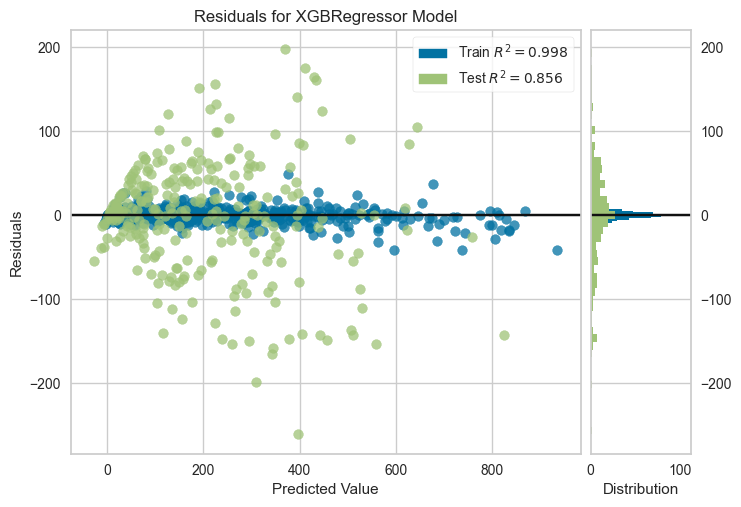

In [23]:
exp1.plot_model(tune_xgboost)

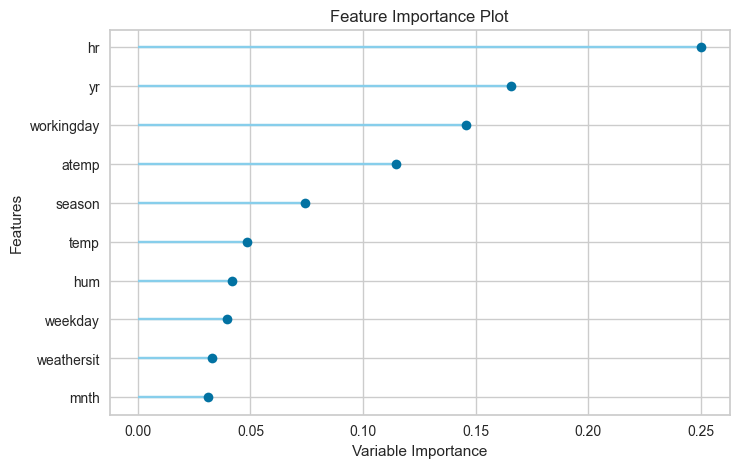

In [24]:
exp1.plot_model(tune_xgboost,plot='feature')

In [25]:
exp1.plot_model(tune_xgboost,plot='parameter')

,Parameters
objective,reg:squarederror
base_score,None
booster,gbtree
callbacks,None
colsample_bylevel,None
colsample_bynode,None
colsample_bytree,0.7
early_stopping_rounds,None
enable_categorical,False
eval_metric,None


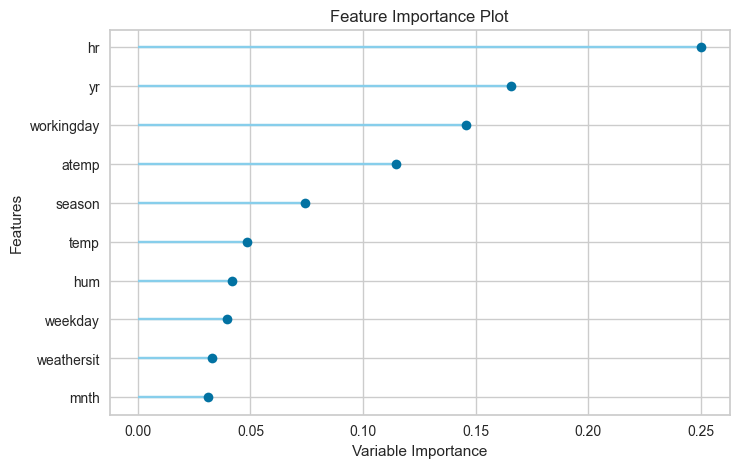

In [26]:
exp1.plot_model(tune_xgboost,plot='feature')

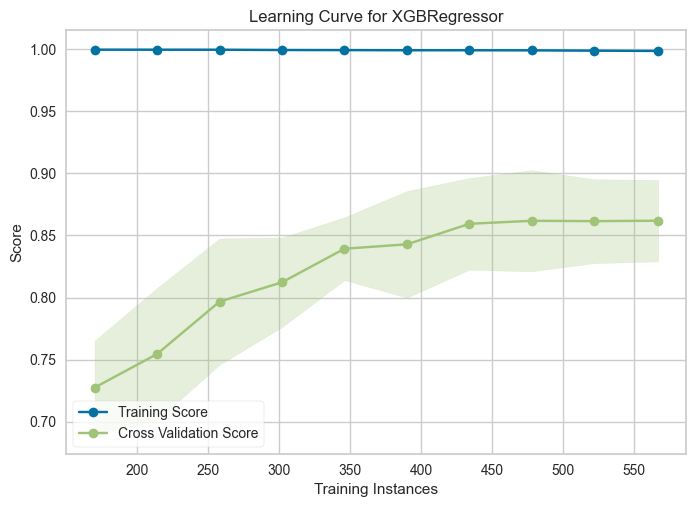

In [27]:
exp1.plot_model(tune_xgboost,plot='learning')

the model has high variance, increasing sample size will help. 

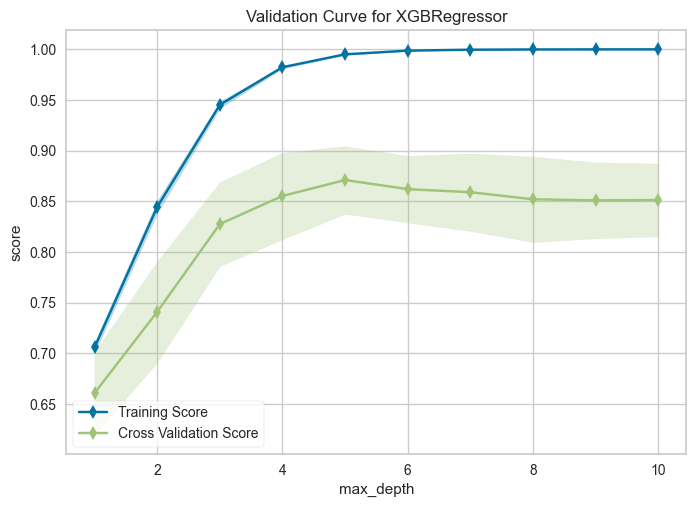

In [28]:
exp1.plot_model(tune_xgboost, plot = 'vc')

As you can see, the model is overfitting with max_depth = 9. 

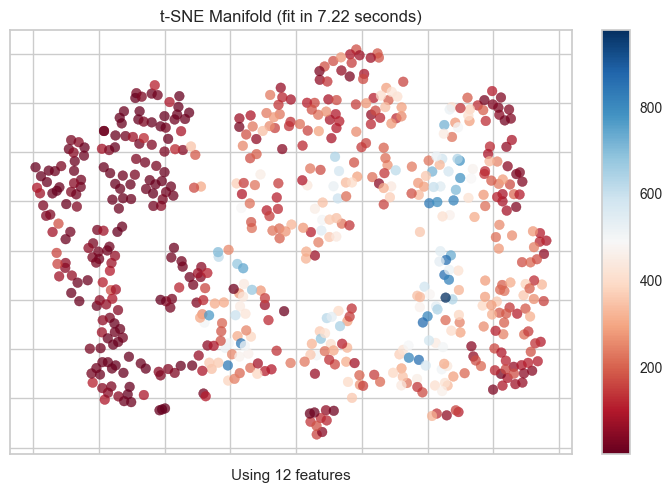

In [29]:
exp1.plot_model(tune_xgboost, plot = 'manifold')

Evaluate model

This function displays a user interface for analyzing performance of a trained model. It calls the plot_model function internally.

I don't recommend using this evaluate model functionality! very slow plus bugs! do separate plots instead.

In [30]:
lr=exp1.create_model('lr',fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,109.6955,20591.6445,143.4979,0.4107,1.1069,2.5015
1,134.1062,30748.8587,175.3535,0.4186,1.3938,4.0857
2,108.0270,19497.1497,139.6322,0.4023,1.2632,3.6441
3,120.5760,25219.3361,158.8060,0.3144,1.2792,3.4173
4,118.2571,23417.5267,153.0279,0.3911,1.2077,3.1164
Mean,118.1323,23894.9031,154.0635,0.3874,1.2502,3.3530
Std,9.3215,3980.2128,12.6232,0.0376,0.0938,0.5304


In [31]:
exp1.evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Interpret model

This function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (SHapley Additive exPlanations). For more info on this, please see https://shap.readthedocs.io/en/latest/

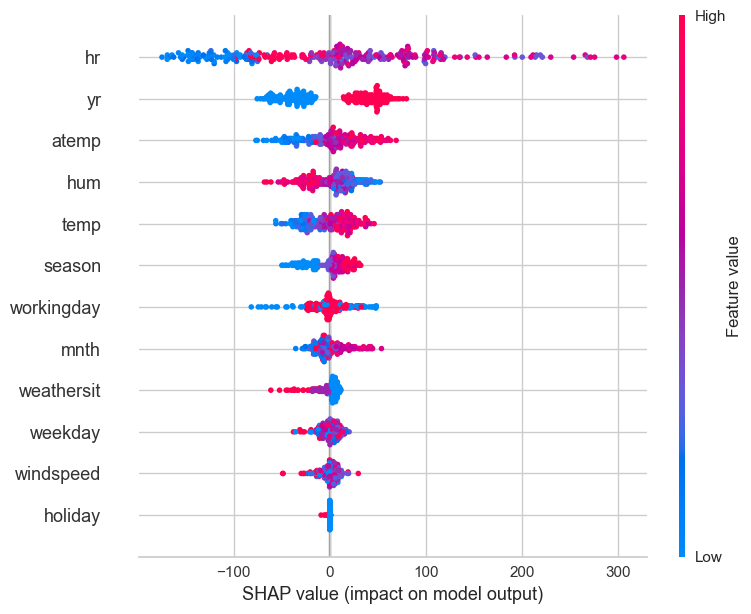

In [32]:
exp1.interpret_model(tune_xgboost)

Ensemble a Model

Ensembling is a common machine learning technique used to improve the performance of models (mostly tree based). There are various techniques for ensembling that we will cover in this section. These include Bagging and Boosting

In [33]:
# lets create a simple decision tree model that we will use for ensembling 
dt=exp1.create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,68.9841,9491.5238,97.4245,0.6503,0.7675,0.9448
1,73.3175,11176.1746,105.7174,0.7371,0.7362,0.9001
2,77.0952,12862.5238,113.4131,0.6772,0.6676,0.4854
3,76.2063,18604.9048,136.3998,0.7177,0.7201,0.4417
4,83.9048,16275.3016,127.5747,0.6025,0.7032,0.5786
5,64.9841,7412.0000,86.0930,0.6873,0.6882,0.6541
6,87.2381,17713.3651,133.0916,0.5531,0.7048,0.8512
7,102.3175,25637.8730,160.1183,0.2395,1.0102,1.3843
8,88.7302,18907.5238,137.5046,0.5521,0.7450,0.5569


In [34]:
bagged_dt=exp1.ensemble_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,62.5984,8695.7827,93.2512,0.6796,0.7218,0.8761
1,55.9254,6004.2538,77.4871,0.8587,0.6224,0.7894
2,56.0794,6533.3276,80.8290,0.8360,0.4298,0.4123
3,62.6921,10921.9794,104.5083,0.8343,0.4888,0.5433
4,60.2254,7585.9143,87.0972,0.8147,0.5552,0.5490
5,52.8810,5791.9894,76.1051,0.7556,0.6705,0.9366
6,59.6857,8084.5178,89.9139,0.7960,0.6104,0.8126
7,67.7111,10563.0724,102.7768,0.6867,0.7212,0.9619
8,77.2413,14245.3441,119.3539,0.6625,0.5969,0.7156


In [37]:
boosted_dt = exp1.ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,50.5397,5464.8571,73.9247,0.7986,0.6469,0.5913
1,64.8254,7140.1270,84.4993,0.8320,0.7532,1.0256
2,57.0317,7062.2063,84.0369,0.8228,0.5095,0.4530
3,73.2222,15331.9841,123.8224,0.7673,0.4709,0.4580
4,59.0317,7673.6667,87.5995,0.8126,0.5490,0.6321
5,54.6984,5580.7302,74.7043,0.7645,0.7179,0.8182
6,54.5238,8660.3016,93.0607,0.7815,0.4928,0.4408
7,85.4127,17088.4603,130.7228,0.4931,0.8233,1.1807
8,72.0635,15359.9048,123.9351,0.6361,0.6442,0.8246


Blending and Stacking

    Blend trains a Voting Regressor for select models passed in the estimator_list param. It creates multiple models and then averages the individual predictions to form a final prediction.

    Stack trains a meta model over select estimators passed in the estimator_list parameter. Stacking is another popular technique for ensembling but is less commonly implemented due to practical difficulties. Stacking is an ensemble learning technique that combines multiple models via a meta-model. Another way to think about stacking is that multiple models are trained to predict the outcome and a meta-model is created that uses the predictions from those models as an input along with the original features. The implementation of stack_models() is based on Wolpert, D. H. (1992b). Stacked generalization


In [38]:
top3_exp1

[XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=555, ...),
 LGBMRegressor(random_state=555),
 ExtraTreesRegressor(n_jobs=-1, random_state=555)]

In [39]:
blender=exp1.blend_models(estimator_list=top3_exp1)
# you can use any mix of models:) for example ['rf','xgboost', 'lr']

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,40.1148,3504.4442,59.1983,0.8709,0.4816,0.4808
1,44.5644,3864.1711,62.1625,0.9091,0.5700,0.6758
2,43.6821,4243.8540,65.1449,0.8935,0.4635,0.5295
3,53.5274,7447.1103,86.2966,0.8870,0.5971,0.7455
4,43.4784,3556.9307,59.6400,0.9131,0.5067,0.5937
5,39.8674,3538.7517,59.4874,0.8507,0.5622,0.6702
6,44.2430,4040.7522,63.5669,0.8981,0.4752,0.5513
7,51.7887,6383.4995,79.8968,0.8106,0.6220,0.7837
8,52.4747,7924.3239,89.0187,0.8123,0.5926,0.5053


In [40]:
blender

VotingRegressor(estimators=[('Extreme Gradient Boosting',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=-1,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=555, ...)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=555)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=555))],
                n_jobs=-1)

Now that we have created a VotingRegressor using the blend_models() function. The model returned by the blend_models function is just like any other model that you would create using create_model() or tune_model(). You can use this model for predictions on unseen data using predict_model() in the same way you would for any other model.

In [41]:
stacker=exp1.stack_models(estimator_list=top3_exp1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,40.5635,3381.9166,58.1542,0.8754,0.4683,0.4591
1,42.7892,3686.8293,60.7193,0.9133,0.6625,0.5940
2,47.9039,5344.4392,73.1057,0.8659,0.6379,0.4463
3,51.3422,6980.5186,83.5495,0.8941,0.6216,0.7200
4,41.9231,3268.7942,57.1734,0.9202,0.4718,0.5784
5,40.7511,3680.9365,60.6707,0.8447,0.5410,0.4533
6,41.6372,3505.4149,59.2065,0.9116,0.4511,0.4437
7,52.8768,6449.7312,80.3102,0.8087,0.6737,0.8845
8,50.0746,8547.7624,92.4541,0.7975,0.5252,0.5536


In [42]:
stacker

StackingRegressor(cv=5,
                  estimators=[('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=555, ...)),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(random_state=555)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=555))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

In [45]:
xgboost=exp1.create_model('xgboost')
stacker_xgboost=exp1.stack_models(top3_exp1,meta_model=xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,37.4302,3032.3718,55.0670,0.8883,0.5267,0.4775
1,45.7594,4480.6257,66.9375,0.8946,0.5724,0.5794
2,49.0889,5433.6675,73.7134,0.8636,0.5161,0.5233
3,54.5599,8202.9704,90.5703,0.8755,0.6387,0.6634
4,46.4576,3734.2961,61.1089,0.9088,0.5687,0.5996
5,47.2742,4473.1882,66.8819,0.8113,0.5709,0.6481
6,42.9927,3650.3759,60.4183,0.9079,0.5616,0.6122
7,56.1641,6830.8523,82.6490,0.7974,0.6324,0.6921
8,51.5532,8774.1423,93.6704,0.7921,0.4254,0.4337


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,43.6009,3984.3316,63.1216,0.8532,0.5399,0.4814
1,58.7051,8747.5423,93.5283,0.7942,0.5576,0.5991
2,63.4587,8619.8589,92.8432,0.7837,0.4628,0.4435
3,67.0368,9559.3833,97.7721,0.8549,0.7208,1.0025
4,50.7586,4536.3639,67.3525,0.8892,0.4987,0.5531
5,54.4089,6425.2952,80.1579,0.7289,0.5721,0.6166
6,52.9109,6809.4211,82.5192,0.8282,0.4286,0.3986
7,55.0964,7866.5915,88.6938,0.7666,0.6574,0.7859
8,64.8070,13922.7138,117.9945,0.6702,0.4762,0.4484


In [46]:
stacker_xgboost

StackingRegressor(cv=5,
                  estimators=[('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction...
                                               gpu_id=None, grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=-1,
                                               num_parallel_tree=None,
                                               predictor=None, random_state=555, ...),
                  n_jobs=-1)

Before we wrap up this section, there is another parameter in stack_models() that we haven't seen yet called restack. This parameter controls the ability to expose the raw data to the meta model. When set to True, it exposes the raw data to the meta model along with all the predictions of the base level models. By default it is set to True

AutoML

This function returns the best model out of all trained models in current session based on the optimize parameter. Metrics evaluated can be accessed using the get_metrics function.

I don't recommend doing it this way! very slow!

In [48]:
# we already have top3_expr1, blender and stacker so far. Let's make tuned_top3_expr1 and pick the best one. 


tuned_top3_expr=[exp1.tune_model(i) for i in top3_exp1]
best_R2_model=exp1.automl(optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,43.3436,3051.9816,55.2447,0.8875,0.7023,0.5928
1,52.8095,5732.4491,75.7129,0.8651,0.5958,0.7493
2,49.3913,4467.4779,66.8392,0.8879,0.6294,0.7313
3,56.5669,6975.3146,83.5183,0.8941,0.7885,1.3177
4,48.7210,3817.1355,61.7830,0.9068,0.6243,0.8280
5,47.4196,4495.7714,67.0505,0.8103,0.7644,1.1563
6,42.2797,4751.9930,68.9347,0.8801,0.6108,0.8516
7,49.3608,6041.0924,77.7245,0.8208,0.6214,0.6832
8,55.3046,6884.3112,82.9717,0.8369,0.6280,0.8258


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,60.8492,6243.9790,79.0189,0.7699,1.0605,1.1183
1,64.5889,8306.2622,91.1387,0.8046,0.8114,1.1587
2,66.8495,7275.9225,85.2990,0.8174,0.9491,1.3731
3,74.1670,10820.9231,104.0237,0.8358,1.0370,2.3104
4,59.8583,6943.5149,83.3278,0.8304,0.6475,1.1197
5,60.9548,6230.7515,78.9351,0.7371,0.8773,1.4490
6,56.2026,7351.9861,85.7437,0.8145,0.7472,1.2433
7,60.7738,7985.4167,89.3612,0.7631,0.8353,1.2797
8,70.5752,10277.4345,101.3777,0.7565,0.6837,0.9392


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,58.7415,6522.5462,80.7623,0.7597,0.6197,0.7273
1,60.8051,7232.7299,85.0455,0.8298,0.7021,0.9507
2,60.1817,6871.2450,82.8930,0.8275,0.5425,0.6419
3,77.8522,16205.1913,127.2996,0.7541,0.6693,0.9406
4,61.2120,8048.8643,89.7155,0.8034,0.6552,0.9443
5,54.9259,5923.2454,76.9626,0.7501,0.7252,1.2854
6,68.7014,10148.0765,100.7377,0.7440,0.6737,0.9648
7,68.8724,10711.1013,103.4945,0.6823,0.7412,1.0970
8,75.0370,11351.5223,106.5435,0.7311,0.6029,0.7658


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [49]:
best_R2_model

VotingRegressor(estimators=[('Extreme Gradient Boosting',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr...
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=-1,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=555, ...)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=555)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=555))],
                n_jobs=-1)

Predict Model

This function predicts Label using a trained model. When data is None, it predicts label on the holdout set.

note: so far, our best model is the stacker model with the highest CV R2. :)

In [50]:
holdout_pred = exp1.predict_model(stacker)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,42.0079,3506.9186,59.2192,0.8912,0.5111,0.7260


Finalize Model

This function trains a given estimator on the entire dataset including the holdout set.

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with setup(), followed by comparing all models using compare_models() and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [51]:
final_stacker = exp1.finalize_model(stacker)

Final prediciton on unseen data

The predict_model() function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the data_unseen parameter. data_unseen is the variable created at the beginning of the tutorial and contains 10% of the original dataset which was never exposed to PyCaret.

In [52]:
unseen_predictions = exp1.predict_model(final_stacker, data=data_unseen)
unseen_predictions.tail()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,42.7336,3849.8211,62.0469,0.8797,0.5382,0.5548


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,prediction_label
95,2,1,6,20,0,5,1,3,0.62,0.5455,0.94,0.2537,39,169.426937
96,1,0,2,5,0,4,1,1,0.32,0.3333,0.66,0.0896,12,2.450202
97,1,0,12,20,0,3,1,1,0.24,0.2273,0.41,0.2239,79,72.654440
98,1,0,2,7,0,1,1,1,0.18,0.2424,0.86,0.0000,95,104.704004
99,1,1,1,3,0,3,1,1,0.26,0.2576,0.75,0.1940,1,-3.269450


Save Model

This function saves the transformation pipeline and trained model object into the current working directory as a pickle file for later use.

In [59]:
my_winning_regressor = exp1.save_model(final_stacker, 'my_pycaret_regression')

Transformation Pipeline and Model Successfully Saved


Load model

This function loads a previously saved pipeline.

In [60]:
my_winning_regressor

(Pipeline(memory=Memory(location=C:\Users\IT\AppData\Local\Temp\joblib),
          steps=[('placeholder', None),
                 ('actual_estimator',
                  StackingRegressor(cv=5,
                                    estimators=[('Extreme Gradient Boosting',
                                                 XGBRegressor(base_score=None,
                                                              booster='gbtree',
                                                              callbacks=None,
                                                              colsample_bylevel=None,
                                                              colsample_bynode=None,
                                                              colsample_bytree=None,
                                                              early_stopping_rounds=None,
                                                              enable_categor...
                                                              max_

Deploy Model

This function deploys the transformation pipeline and trained model on cloud.

https://pycaret.readthedocs.io/en/latest/api/regression.html#pycaret.regression.deploy_model